# 4. モンテカルロ法

## ビュフォンの針

ビュフォンの針（Buffon's needle problem）は18世紀の博物学者ジョルジュ＝ルイ・ルクレール、コント・ド・ビュフォンが提起した数学上の問題。

平面上に平行線を何本か引き、その間隔と同じ長さの針をその上に落とす。針はランダムに落ち、平行線と交わるものと、交わらないものが生じる。このとき、針の交わる確率が、 $2/\pi$ となることから、落とした針の本数と、交わった針の本数の比とから、πを求めようとするもの。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig5-1-11.jpg)

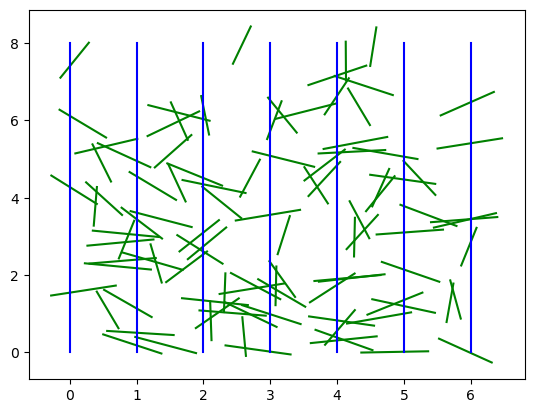

π =   2.816901

In [1]:
using Random
using PyPlot
using Printf

number = 100
x_max = 6
y_max = 8
n1 = 0

for j = 1:number
    x0 = x_max * rand()
    y0 = y_max * rand()
    th = 2π * rand()
    x1 = x0 + cos(th) / 2.0
    y1 = y0 + sin(th) / 2.0
    x2 = x0 - cos(th) / 2.0
    y2 = y0 - sin(th) / 2.0
    x = [x1, x2]
    y = [y1, y2]
    
    plot(x, y, color="green")
    
    if Int(floor(x1)) != Int(floor(x2))
        n1 += 1
    end
end

for i = 0:x_max
    x = [i, i]
    y = [0, y_max]
    plot(x, y, color="blue")
end

@printf "π = %10f" number/n1*2.0

## モンテカルロ法による数値積分

大数の法則を応用して、ビュフォンの針を一般化する。

半径 1 の 1/4 円を、一辺が 1 の正方形に接するように書くとする。この正方形を、雨の降る中にさらしたとする。雨滴は均一に、ランダムに降りそそぐので、 1/4 円の内側（図の A の部分）も、残りの部分（図の B の部分）もぬらす。A の部分に落ちる雨滴の数と、正方形の雨滴の数の比は、大数の法則により面積の比に近づくはず。すなわち、

$$
    \frac{A の部分の雨滴の数}{正方形の雨滴の数} \rightarrow  \frac{A の面積}{正方形の面積} 
$$ 

となる。

右辺は、$\pi/4$ なので、もし雨滴の数を数えることができれば、

$$
    \pi \approx \frac{A の部分の雨滴の数}{全体の雨滴の数}\times 4
$$

として $\pi$ が計算できるはず。

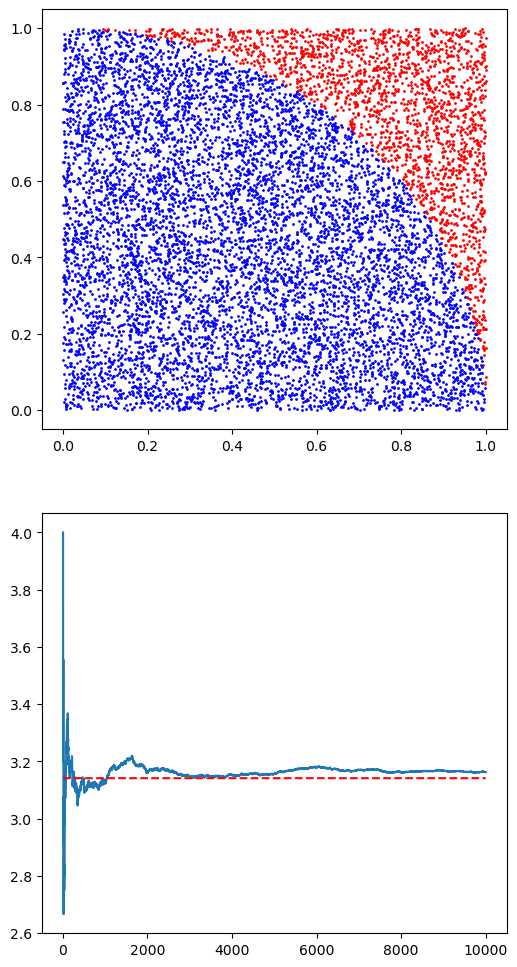

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffa65b7d040>

In [1]:
using Random
using PyPlot
using Printf

number = 10000
n1 = 0
p = zeros(Float64, number)
pi_line = fill(π, number, 1)

fig = PyPlot.figure(figsize=(6.0, 12.0))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for i = 1:number
    x0 = rand()
    y0 = rand()

    if (x0^2 + y0^2 < 1.0)
        n1 +=1
        ax1.scatter(x0, y0, marker="o", s=1, color="blue")
    else
        ax1.scatter(x0, y0, marker="o", s=1, color="red")
    end
    
    pi = n1 / i * 4
    p[i] = pi
end

x = 1:number
ax2.plot(x, p)
ax2.plot(x, pi_line, "--", color="red")

## モンテカルロ法による多重積分

球の体積をモンテカルロ法により求める。半径 1 の球は

$$
    x^2 + y^2 + z^2 = 1
$$

で表されるので、この球の体積 $V$ は $x-y$ 平面、$y-z$ 平面、$z-x$ 平面で切り取られる体積の 8 倍なので、

$$
    V = 8\int_0^1\int_0^1\sqrt{1-x^2-y^2} dxdy
$$

という定積分を行うことになる。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig5-3-1.jpg)

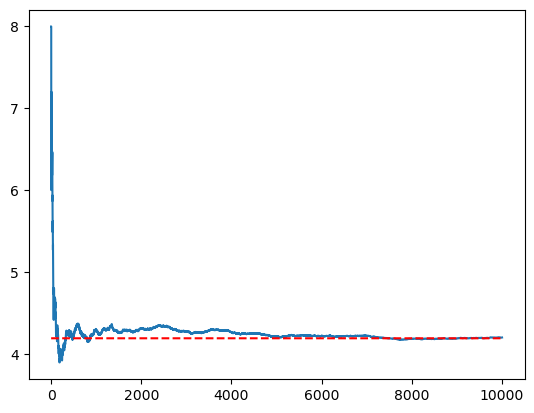

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc8e807aa60>

In [3]:
using Random
using PyPlot
using Printf

number = 10000
n1 = 0
v = zeros(Float64, number)
theory = fill(4.0 / 3.0 * π, number, 1)

for i = 1:number
    x0 = rand()
    y0 = rand()
    z0 = rand()
    
    if (x0^2 + y0^2 + z0^2 < 1.0)
        n1 +=1
    end
    v[i] = n1 / i * 8.0
end

x = 1:number
plot(x, v)
plot(x, theory, "--", color="red")

## 演習問題

1. モンテカルロ法により以下の数値積分を求めなさい：
$$
    \int_0^{\infty} e^{-x} dx
$$
（参考）理論値は、 $1-e^{-1}=0.632121$ となる。

2. 次の
$$
    \int_0^{1} f(x)dx
$$
という定積分を行うとき、区間 $[0,1)$ の乱数 $r_i$ を用いて、それを $f(x)$ に次々代入し、
$$
    \frac{1}{n}\sum_{i=1}^{n}f(r_i)
$$
としても求められる。これにより、1. と同じ定積分を求めなさい。

3. 2. を拡張して、多重積分
$$
    \int_0^1\int_0^1\int_0^1f(x,y,z)dxdydz
$$
を求めることが出来る。すなわち、3個一組の区間 $[0,1)$ の乱数 $x_0, y_0, z_0$ を $n$ 組発生させ、
$$
    \frac{1}{n}\sum_{i=1}^{n}f(x_0,y_0,z_0)
$$
として求める。この方法により、
$$
    \int_0^1\int_0^1\int_0^1\frac{1}{(0.01+x)+(0.02+y)+(0.03+z)}dxdydz
$$
を求めよ。

### 演習 1 回答

In [4]:
using Random
using Printf

number = 10000
n1 = 0

for i = 1:number
    x0 = rand()
    y0 = rand()
    if y0 < exp(-x0)
        n1 += 1
    end
end

s = n1 / number

@printf "s = %8f" s

s = 0.632400

### 演習2 回答

In [5]:
using Random
using Printf

number = 10000

for i = 1:number
    y0 = exp(-rand())
    s += y0
end

s = s / number
@printf "s = %8f" s

s = 0.631392

### 演習3 回答

In [6]:
using Random
using Printf

number = 10000

for i = 1:number
    x0 = rand()
    y0 = rand()
    z0 = rand()
    s += 1.0 / ((0.01+x0)+(0.02+y0)+(0.03+z0))
end

s = s / number
@printf "s = %8f" s

s = 0.733292